Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
No GPU available, running on CPU.
Checking training set...
Class apple has 67 images in training set
Class turnip has 93 images in training set
Class chilli pepper has 81 images in training set
Class raddish has 79 images in training set
Class bell pepper has 88 images in training set
Class pear has 88 images in training set
Class sweetpotato has 69 images in training set
Class pomegranate has 78 images in training set
Class peas has 96 images in training set
Class capsicum has 84 images in training set
Class spinach has 94 images in training set
Class lettuce has 95 images in training set
Class kiwi has 88 images in training set
Class lemon has 81 images in training set
Class onion has 93 images in training set
Class cauliflower has 76 images in training set
Class potato has 75 images in training set
Class jalepeno has 87 images in training set
Class sweetcorn has 88 images in training set
Class cucu

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 36)             │        36,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,606,628 (13.76 MB)

 Trainable params: 2,554,724 (9.75 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

/Users/macbook/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


/Users/macbook/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


97/97 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.1255 - loss: 3.4068 - val_accuracy: 0.7469 - val_loss: 1.1100 - learning_rate: 1.0000e-04
Epoch 2/30
 1/97 ━━━━━━━━━━━━━━━━━━━━ 34s 364ms/step - accuracy: 0.4688 - loss: 2.0337

/Users/macbook/miniconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.4688 - loss: 2.0337 - val_accuracy: 0.7500 - val_loss: 1.0744 - learning_rate: 1.0000e-04
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 129s 982ms/step - accuracy: 0.5056 - loss: 1.7508 - val_accuracy: 0.7625 - val_loss: 0.6744 - learning_rate: 1.0000e-04
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.5312 - loss: 1.2787 - val_accuracy: 0.7875 - val_loss: 0.6405 - learning_rate: 1.0000e-04
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 94s 968ms/step - accuracy: 0.6428 - loss: 1.2256 - val_accuracy: 0.8281 - val_loss: 0.5063 - learning_rate: 1.0000e-04
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.5938 - loss: 1.3178 - val_accuracy: 0.8313 - val_loss: 0.4800 - learning_rate: 1.0000e-04
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6877 - loss: 1.0405 - val_accuracy: 0.8500 - val_loss: 0.3891 - learning_rate: 1.0000e-04
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.6562 -

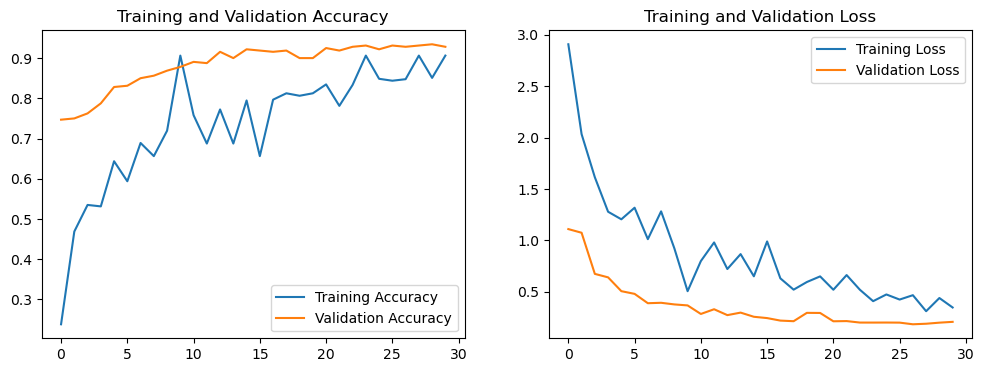

Improved model saved as 'fruit_vegetable_classifier_improved.keras'


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.utils.class_weight import compute_class_weight

train_dir = './train'
validation_dir = './validation'

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

print("Checking training set...")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        print(f"Class {class_name} has {num_images} images in training set")

print("\nChecking validation set...")
for class_name in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        print(f"Class {class_name} has {num_images} images in validation set")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print(f"Number of classes in train_generator: {len(train_generator.class_indices)}")
print(f"Class labels in train_generator: {train_generator.class_indices}")
print(f"Total training samples: {train_generator.samples}")
print(f"Number of classes in validation_generator: {len(validation_generator.class_indices)}")
print(f"Class labels in validation_generator: {validation_generator.class_indices}")
print(f"Total validation samples: {validation_generator.samples}")

y_train = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("Class weights:", class_weight_dict)

NUM_CLASSES = len(train_generator.class_indices)

base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

EPOCHS = 30
steps_per_epoch = train_generator.samples // BATCH_SIZE
if steps_per_epoch == 0:
    steps_per_epoch = 1
validation_steps = validation_generator.samples // BATCH_SIZE
if validation_steps == 0:
    validation_steps = 1

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr]
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

model.save('fruit_vegetable_classifier_improved.keras')
print("Improved model saved as 'fruit_vegetable_classifier_improved.keras'")

Model loaded successfully from .keras file.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
Predicted class: carrot
Confidence: 100.00%


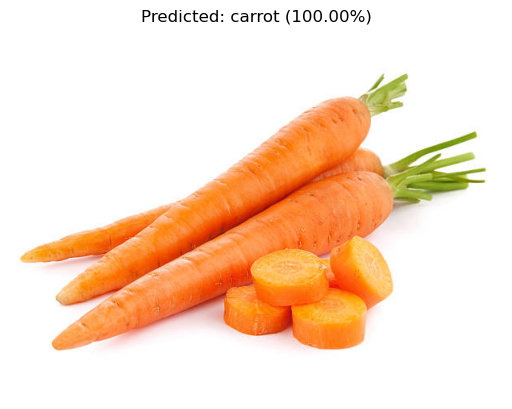

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('fruit_vegetable_classifier_improved.keras')
print("Model loaded successfully from .keras file.")



class_labels = [
    'apple', 'banana', 'beetroot', 'bell_pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower',
    'chilli_pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno',
    'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple',
    'pomegranate', 'potato', 'raddish', 'soy_beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato',
    'turnip', 'watermelon', 'apricot', 'avocado', 'broccoli', 'brussels_sprouts', 'celery', 'cherries',
    'coconut', 'fig', 'green_beans', 'leek', 'lime', 'mushroom', 'okra', 'peach', 'plum', 'pumpkin',
    'raspberry', 'strawberry', 'zucchini'


def preprocess_image(img_path):

    img = image.load_img(img_path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)
    return img_array


img_path = 'carrot.jpg' 


img_array = preprocess_image(img_path)


prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
confidence = prediction[0][predicted_class_index] * 100  


print(f"Predicted class: {predicted_class_label}")
print(f"Confidence: {confidence:.2f}%")


img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label} ({confidence:.2f}%)")
plt.axis('off')
plt.show()